::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



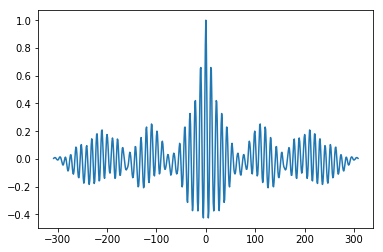

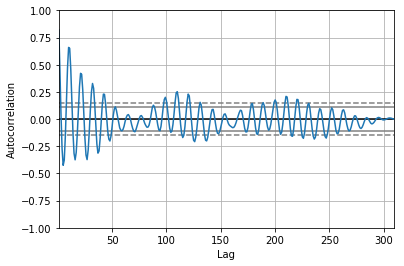

const                49.659554
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
2622.636338066193 2637.5697031737836 2628.606725911439
            AC          Q  Prob(>Q)
lag                                
1.0  -0.085220   2.265967  0.132244
2.0   0.103691   5.631597  0.059857
3.0  -0.027833   5.874881  0.117859
4.0   0.091123   8.491077  0.075158
5.0   0.019010   8.605310  0.125881
6.0   0.031321   8.916436  0.178332
7.0   0.044485   9.546133  0.215785
8.0  -0.034337   9.922564  0.270503
9.0   0.185690  20.967735  0.012794
10.0  0.191608  32.767489  0.000298
11.0  0.190385  44.456229  0.000006
12.0  0.121693  49.247960  0.000002
13.0 -0.016219  49.333362  0.000004
14.0  0.014986  49.406524  0.000008
15.0 -0.063197  50.711971  0.000009
16.0  0.039730  51.229685  0.000015
17.0  0.009577  51.259868  0.000027
18.0 -0.073645  53.050927  0.000026
19.0  0.076469  54.988661  0.000023
20.0 -0.006827  55.004159  0.000041
21.0  0.088818  57.636422  0.000029
22.0  0.1

            AC          Q      Prob(>Q)
lag                                    
1.0   0.003654   0.004166  9.485368e-01
2.0   0.016284   0.087174  9.573493e-01
3.0  -0.012200   0.133920  9.874771e-01
4.0   0.135484   5.917443  2.053991e-01
5.0   0.087475   8.336337  1.386477e-01
6.0   0.081117  10.423232  1.079234e-01
7.0   0.053309  11.327548  1.249560e-01
8.0  -0.029051  11.596994  1.701109e-01
9.0   0.177629  21.704015  9.865888e-03
10.0  0.210414  35.933803  8.640960e-05
11.0  0.198595  48.652402  1.091800e-06
12.0  0.113626  52.829928  4.416473e-07
13.0 -0.017531  52.929708  9.294840e-07
14.0  0.010195  52.963566  1.929806e-06
15.0 -0.028636  53.231603  3.528622e-06
16.0  0.076134  55.132743  3.381878e-06
17.0  0.034417  55.522588  5.646771e-06
18.0 -0.058278  56.644190  7.048585e-06
19.0  0.057447  57.737791  8.771703e-06
20.0 -0.011998  57.785656  1.558887e-05
21.0  0.074738  59.649510  1.442885e-05
22.0  0.127935  65.129948  3.773178e-06
23.0  0.092605  68.011453  2.456410e-06


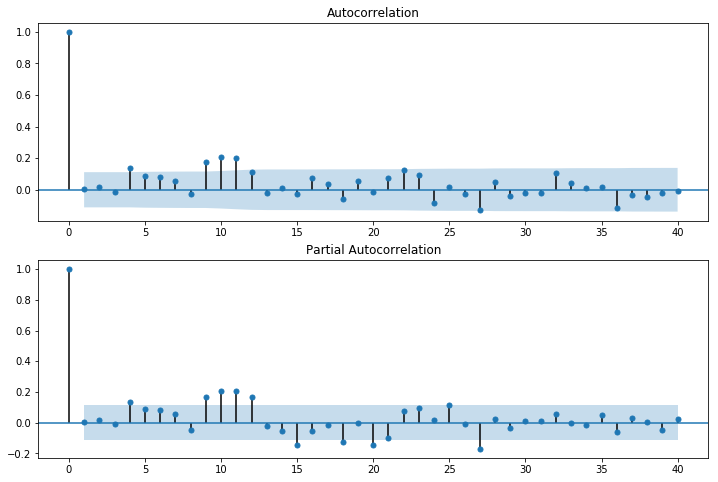

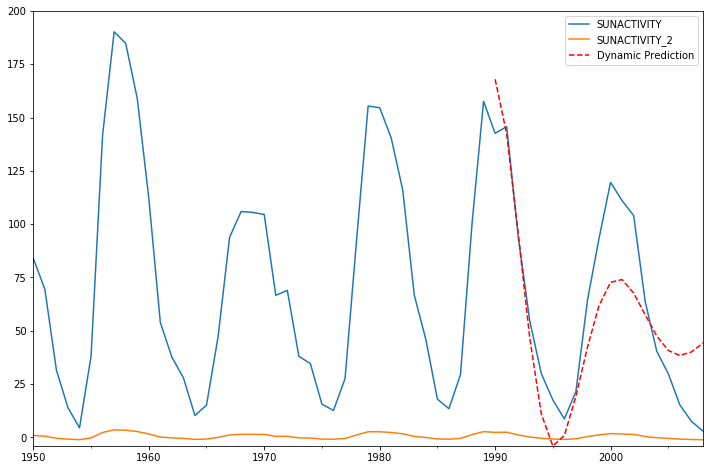

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

dta= pd.read_csv("sunspots.csv")



print (sm.datasets.sunspots.NOTE)


dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));
sm.stats.durbin_watson(dta)



# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

from pandas.plotting import autocorrelation_plot

# show plots in the notebook
%matplotlib inline
dta['SUNACTIVITY_2'] = dta['SUNACTIVITY']
dta['SUNACTIVITY_2'] = (dta['SUNACTIVITY_2'] - dta['SUNACTIVITY_2'].mean()) / (dta['SUNACTIVITY_2'].std())
plt.acorr(dta['SUNACTIVITY_2'],maxlags = len(dta['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['SUNACTIVITY'])
plt.show()



arma_mod20 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,0)).fit()
print (arma_mod20.params)

#11
print (arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

sm.stats.durbin_watson(arma_mod20.resid.values)
#14
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

resid20 = arma_mod20.resid
stats.normaltest(resid20)
#16issue
#17
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)
#18
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

#19
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))


#20
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print (predict_sunspots20)

#21
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()


def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100


#24
print ("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print ("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

arma_mod30 = sm.tsa.ARMA(dta['SUNACTIVITY'], (3,0)).fit()


print (arma_mod30.params)

print (arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)
sm.stats.durbin_watson(arma_mod30.resid.values)
#29
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

resid30 = arma_mod30.resid
stats.normaltest(resid30)


#NormaltestResult(statistic=49.845020032909339, pvalue=1.5006915069024666e-11)
#32
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid30, line='q', ax=ax, fit=True)

#33
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)


#34


r,q,p = sm.tsa.acf(resid30.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))




#35

predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
print (predict_sunspots30)


#36
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots30.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));


print ("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots30))
print ("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots30))

arma_mod40 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,1)).fit()
res40 = arma_mod40.resid


print (arma_mod40.params)
#41
print (arma_mod40.aic, arma_mod40.bic, arma_mod40.hqic)
sm.stats.durbin_watson(arma_mod40.resid.values)
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)
resid40 = arma_mod40.resid
stats.normaltest(resid40)


#NormaltestResult(statistic=48.550090206155012, pvalue=2.8673576316879386e-11)
#46
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)


print ("Metric for ARMA(2,1):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots40),"MFE")


print ("Metric for ARMA(2,1):    ",mean_absolute_err(dta.SUNACTIVITY, predict_sunspots40),"MAE")

arma_mod50 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,3)).fit()
sm.stats.durbin_watson(arma_mod50.resid.values)
#51

print (arma_mod50.params)


print (arma_mod50.aic, arma_mod50.bic, arma_mod50.hqic)
resid50 = arma_mod50.resid
stats.normaltest(resid50)


#NormaltestResult(statistic=48.615275864226881, pvalue=2.7754089086771973e-11)
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)
#56
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots50.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));


print ("Metric for ARMA(3,2):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots50),"MLE")


print ("Metric for ARMA(3,2):    ",mean_absolute_err(dta.SUNACTIVITY, predict_sunspots50),"MAE")
#59
arima_mod1 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (3,0,2)).fit()


print (arima_mod1.params)
sm.stats.durbin_watson(arima_mod1.resid.values)


print (arima_mod1.aic, arima_mod1.bic, arima_mod1.hqic)
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_mod1.resid.plot(ax=ax);

resid1 = arima_mod1.resid
stats.normaltest(resid1)
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

#67
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))


#69
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)
print (predict_sunspots1)

ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots1.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

print ("Metrics for ARIMA(3,0,2): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots1),"MLE")


print ("Metrics for ARIMA(3,0,2): ",mean_absolute_err(dta.SUNACTIVITY, predict_sunspots1),"MAE")
#73
arima_mod2 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (2,0,3)).fit()


print (arima_mod2.params)

mean_forecast_err(dta.SUNACTIVITY, predict_sunspots30)



print (arima_mod2.aic, arima_mod2.bic, arima_mod2.hqic)
#77
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_mod2.resid.plot(ax=ax);

resid2 = arima_mod2.resid
stats.normaltest(resid2)
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid2, line='q', ax=ax, fit=True)
#81
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid2.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid2, lags=40, ax=ax2)



r,q,p = sm.tsa.acf(resid2.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))


#83
predict_sunspots2 = arima_mod2.predict('1990', '2012', dynamic=True)
print (predict_sunspots2)


print ("Metrics for ARIMA(2,0,3): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots2),"MLE")
print ("Metrics for ARIMA(2,0,3): ",mean_absolute_err(dta.SUNACTIVITY, predict_sunspots2),"MAE")
#86
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots2.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));


#87
print ("Model 1: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 2: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print ("Model 3: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
print ("Model 4: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print ("Model 5: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print ("Model 6: ARIMA(2,0,3)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)


#88


print ("Metrics for Model 1 ARMA(2,0):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20),"MAE")
print ("Metrics for Model 2 ARMA(3,0):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots30)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots30),"MAE")
print ("Metrics for Model 3 ARMA(2,1):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots40)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots40),"MAE")
print ("Metrics for Model 4 ARMA(2,3):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots50)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots50),"MAE")
print ("Metrics for Model 5 ARIMA(3,0,2): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots1)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots1),"MAE")
print ("Metrics for Model 6 ARIMA(2,0,3): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots2)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots2),"MAE")

#89


arma_mod10 = sm.tsa.ARMA(dta['SUNACTIVITY'], (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(dta['SUNACTIVITY'], (3,0)).fit()
arma_mod40 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,1)).fit()
arma_mod50 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,3)).fit()
arima_mod1 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (3,0,2)).fit()
arima_mod2 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (2,0,2)).fit()
arima_mod3 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (1,0,0)).fit()
arima_mod4 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (0,1,0)).fit()
arima_mod5 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (0,0,1)).fit()
arima_mod6 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (1,1,0)).fit()
arima_mod7 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (0,1,1)).fit()
arima_mod8 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (1,1,1)).fit()
arima_mod9 = sm.tsa.ARIMA(dta['SUNACTIVITY'], (3,0,3)).fit()
arima_mod10= sm.tsa.ARIMA(dta['SUNACTIVITY'], (1,0,6)).fit()
arima_mod11= sm.tsa.ARIMA(dta['SUNACTIVITY'], (1,0,3)).fit()

#90


print ("Model 01: ARMA(1,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 02: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 03: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print ("Model 04: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
print ("Model 05: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print ("Model 06: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print ("Model 07: ARIMA(2,0,2)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)
print ("Model 08: ARIMA(1,0,0)  AIC", arima_mod3.aic, " BIC", arima_mod3.bic, " HQIC", arima_mod3.hqic)
print ("Model 09: ARIMA(0,1,0)  AIC", arima_mod4.aic, " BIC", arima_mod4.bic, " HQIC", arima_mod4.hqic)
print ("Model 10: ARIMA(0,0,1)  AIC", arima_mod5.aic, " BIC", arima_mod5.bic, " HQIC", arima_mod5.hqic)
print ("Model 11: ARIMA(1,1,0)  AIC", arima_mod6.aic, " BIC", arima_mod6.bic, " HQIC", arima_mod6.hqic)
print ("Model 12: ARIMA(0,1,1)  AIC", arima_mod7.aic, " BIC", arima_mod7.bic, " HQIC", arima_mod7.hqic)
print ("Model 13: ARIMA(1,1,1)  AIC", arima_mod8.aic, " BIC", arima_mod8.bic, " HQIC", arima_mod8.hqic)
print ("Model 14: ARIMA(3,0,3)  AIC", arima_mod9.aic, " BIC", arima_mod9.bic, " HQIC", arima_mod9.hqic)
print ("Model 15: ARIMA(1,0,6)  AIC", arima_mod10.aic, " BIC", arima_mod10.bic, " HQIC", arima_mod10.hqic)
print ("Model 16: ARIMA(1,0,3)  AIC", arima_mod11.aic, " BIC", arima_mod11.bic, " HQIC", arima_mod11.hqic)



predict_sunspots10 = arma_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)
predict_sunspots2 = arima_mod2.predict('1990', '2012', dynamic=True)
predict_sunspots3 = arima_mod3.predict('1990', '2012', dynamic=True)
predict_sunspots4 = arima_mod4.predict('1990', '2012', dynamic=True)
predict_sunspots5 = arima_mod5.predict('1990', '2012', dynamic=True)
predict_sunspots6 = arima_mod6.predict('1990', '2012', dynamic=True)
predict_sunspots7 = arima_mod7.predict('1990', '2012', dynamic=True)
predict_sunspots8 = arima_mod8.predict('1990', '2012', dynamic=True)
predict_sunspots9 = arima_mod9.predict('1990', '2012', dynamic=True)
predict_sunspots10 = arima_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots11 = arima_mod11.predict('1990', '2012', dynamic=True)

#92


print ("Metrics for Model 01 ARMA(1,0):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots10)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots10),"MAE")
print ("Metrics for Model 02 ARMA(2,0):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20),"MAE")
print ("Metrics for Model 03 ARMA(3,0):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots30)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots30),"MAE")
print ("Metrics for Model 04 ARMA(2,1):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots40)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots40),"MAE")
print ("Metrics for Model 05 ARMA(2,3):    ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots50)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots50),"MAE")
print ("Metrics for Model 06 ARIMA(3,0,2): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots1)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots1),"MAE")
print ("Metrics for Model 07 ARIMA(2,0,2): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots2)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots2),"MAE")
print ("Metrics for Model 08 ARIMA(1,0,0): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots3)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots3),"MAE")
print ("Metrics for Model 09 ARIMA(0,1,0): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots4)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots4),"MAE")
print ("Metrics for Model 10 ARIMA(0,0,1): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots5)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots5),"MAE")
print ("Metrics for Model 11 ARIMA(1,1,0): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots6)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots6),"MAE")
print ("Metrics for Model 12 ARIMA(0,1,1): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots7)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots7),"MAE")
print ("Metrics for Model 13 ARIMA(1,1,1): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots8)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots8),"MAE")
print ("Metrics for Model 14 ARIMA(3,0,3): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots9)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots9),"MAE")
print ("Metrics for Model 15 ARIMA(1,0,6): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots10)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots10),"MAE")
print ("Metrics for Model 16 ARIMA(1,0,3): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots11)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots11),"MAE")






















